In [2]:
# Importación de librerías
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

### Carga de datos

In [3]:
# Cargamos el CSV para transformarlo en un Dataframe
df = pd.read_csv("Life Expectancy Data.csv")

# Analizamos el contenido del mismo
print(df.info())
print(df.describe())
print(df.head())

# Valores únicos de cada columna
for col in df.columns:
    print(f"{col}: {len(df[col].unique())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

### Limpieza de datos

In [4]:
# Eliminamos las filas que poseean los valores nulos
df = df.dropna()

# Mapeamos la variable objetivo 
df["Lifeexpectancy"] = np.where(df["Lifeexpectancy"] > 75, "Alto",
                       np.where(df["Lifeexpectancy"] >= 60, "Medio", "Bajo"))
df

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,Medio,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,Bajo,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,Bajo,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,Bajo,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,Bajo,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,Bajo,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,Bajo,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,Bajo,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,Bajo,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Preprocesamiento y división de datos

In [5]:
# Encodeamos las variables categóricas
# La variable Country mediante LabelEncoder
label_encoder = LabelEncoder()
df["Country"] = label_encoder.fit_transform(df["Country"])
# La variable Status mediante OneHotEncoder()
df["Status"] = pd.get_dummies(df["Status"], drop_first=True)

# Elegimos las variables predictores y a predecir
X = df.drop(columns=["Lifeexpectancy"])
y = df["Lifeexpectancy"]

# Estandarizamos las variables numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Entrenamiento del modelo

In [6]:
# Creamos el modelo de regresión logística multinominal
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500) # El parámetro " multi_class='mulnominal' " es el que determina que este modelo de RL sea multinominal

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de la clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Alto       0.91      0.67      0.77        87
        Bajo       0.83      0.82      0.83        55
       Medio       0.82      0.92      0.86       188

    accuracy                           0.84       330
   macro avg       0.85      0.80      0.82       330
weighted avg       0.84      0.84      0.83       330



c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Métricas de evaluación


Accuracy: 0.84
Precision: 0.85
Recall: 0.80
F1-Score: 0.82
AUC-ROC: 0.93


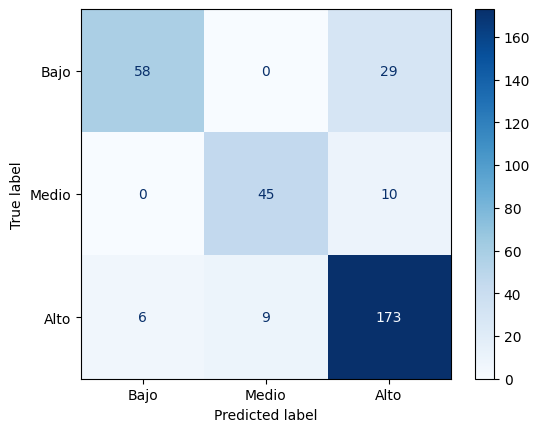

In [8]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'):.2f}")

# Creamos la matriz de confusión y la mostramos
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Bajo", "Medio", "Alto"], cmap= plt.colormaps.get_cmap("Blues"))